<a href="https://colab.research.google.com/github/Sayed-Hossein-Hosseini/HydroWizard_Intelligent_Fuzzy_Logic_Irrigation/blob/master/HydroWizard_Intelligent_Fuzzy_Logic_Irrigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HydroWizard_Intelligent_Fuzzy_Logic_Irrigation**

## **Libraries**

In [10]:
!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from skfuzzy.defuzzify import defuzz
import matplotlib.pyplot as plt

## **Membership Functions**

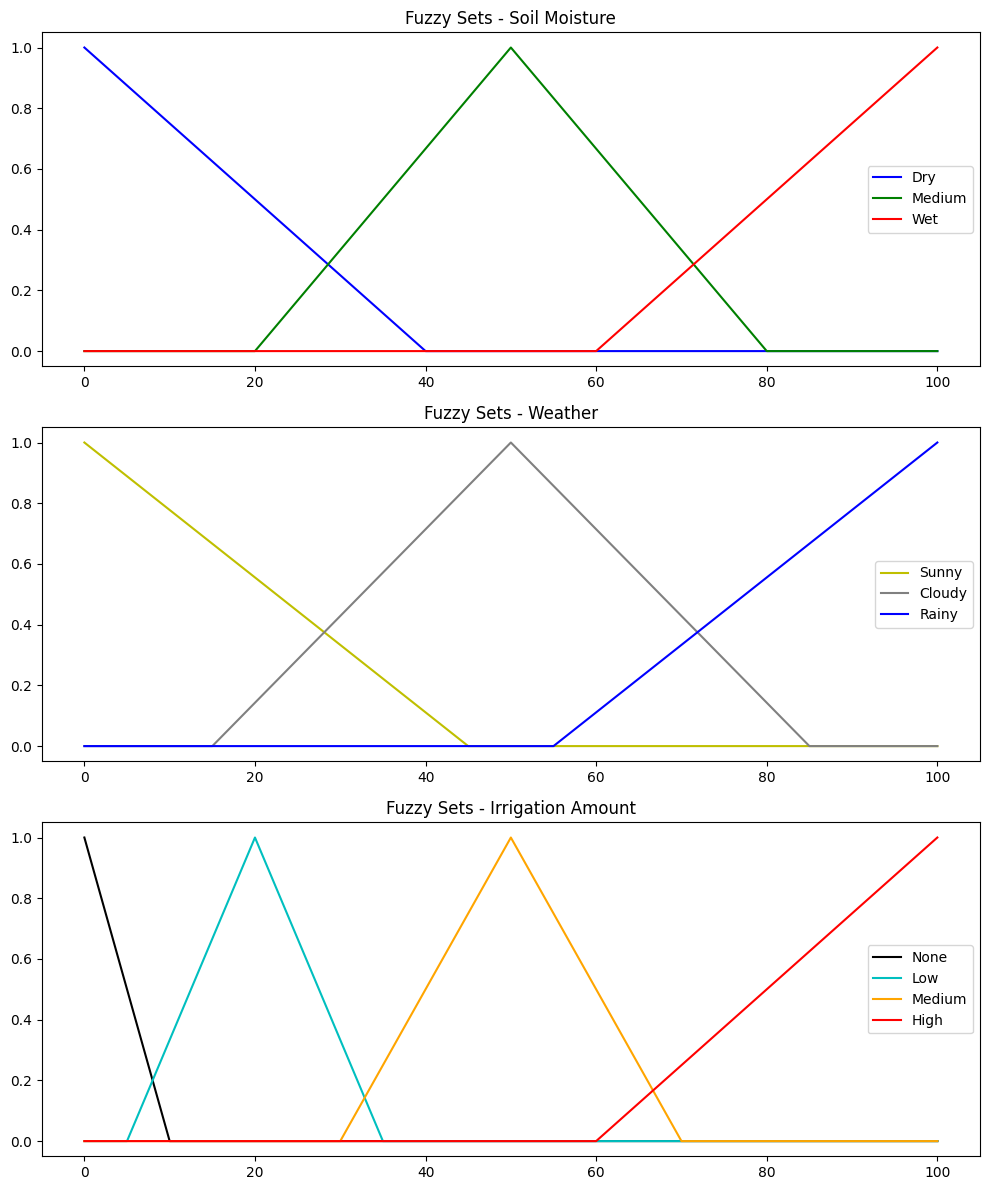

In [3]:
# Define the range of each variable (from 0 to 100)
soil_moisture = np.arange(0, 101, 1)
weather = np.arange(0, 101, 1)
irrigation = np.arange(0, 101, 1)

# Fuzzy membership functions for soil moisture
soil_dry = fuzz.trimf(soil_moisture, [0, 0, 40])
soil_medium = fuzz.trimf(soil_moisture, [20, 50, 80])
soil_wet = fuzz.trimf(soil_moisture, [60, 100, 100])

# Fuzzy membership functions for weather conditions
weather_sunny = fuzz.trimf(weather, [0, 0, 45])
weather_cloudy = fuzz.trimf(weather, [15, 50, 85])
weather_rainy = fuzz.trimf(weather, [55, 100, 100])

# Fuzzy membership functions for irrigation amount (output)
irrigation_none = fuzz.trimf(irrigation, [0, 0, 10])
irrigation_low = fuzz.trimf(irrigation, [5, 20, 35])
irrigation_medium = fuzz.trimf(irrigation, [30, 50, 70])
irrigation_high = fuzz.trimf(irrigation, [60, 100, 100])

# Plotting the fuzzy sets
fig, axs = plt.subplots(nrows=3, figsize=(10, 12))

# Plot fuzzy sets for soil moisture
axs[0].plot(soil_moisture, soil_dry, 'b', label='Dry')
axs[0].plot(soil_moisture, soil_medium, 'g', label='Medium')
axs[0].plot(soil_moisture, soil_wet, 'r', label='Wet')
axs[0].set_title('Fuzzy Sets - Soil Moisture')
axs[0].legend()

# Plot fuzzy sets for weather
axs[1].plot(weather, weather_sunny, 'y', label='Sunny')
axs[1].plot(weather, weather_cloudy, 'gray', label='Cloudy')
axs[1].plot(weather, weather_rainy, 'blue', label='Rainy')
axs[1].set_title('Fuzzy Sets - Weather')
axs[1].legend()

# Plot fuzzy sets for irrigation
axs[2].plot(irrigation, irrigation_none, 'black', label='None')
axs[2].plot(irrigation, irrigation_low, 'c', label='Low')
axs[2].plot(irrigation, irrigation_medium, 'orange', label='Medium')
axs[2].plot(irrigation, irrigation_high, 'red', label='High')
axs[2].set_title('Fuzzy Sets - Irrigation Amount')
axs[2].legend()

plt.tight_layout()
plt.show()


## **Control Rules and Defuzzification**

### **Fuzzy Logic Rules**

In [8]:
# Define fuzzy rules based on the given chart
rule1 = ctrl.Rule(soil['dry'] & weather['sunny'], irrigation['high'])
rule2 = ctrl.Rule(soil['dry'] & weather['cloudy'], irrigation['medium'])
rule3 = ctrl.Rule(soil['dry'] & weather['rainy'], irrigation['low'])

rule4 = ctrl.Rule(soil['medium'] & weather['sunny'], irrigation['medium'])
rule5 = ctrl.Rule(soil['medium'] & weather['cloudy'], irrigation['low'])
rule6 = ctrl.Rule(soil['medium'] & weather['rainy'], irrigation['none'])

rule7 = ctrl.Rule(soil['wet'] & weather['sunny'], irrigation['low'])
rule8 = ctrl.Rule(soil['wet'] & weather['cloudy'], irrigation['none'])
rule9 = ctrl.Rule(soil['wet'] & weather['rainy'], irrigation['none'])

### **Control Rules**

In [9]:
# Create the control system and simulation
irrigation_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
irrigation_sim = ctrl.ControlSystemSimulation(irrigation_ctrl)

### **Defuzzification**

#### **Centroid Method**

Irrigation Output (Centroid): 56.94


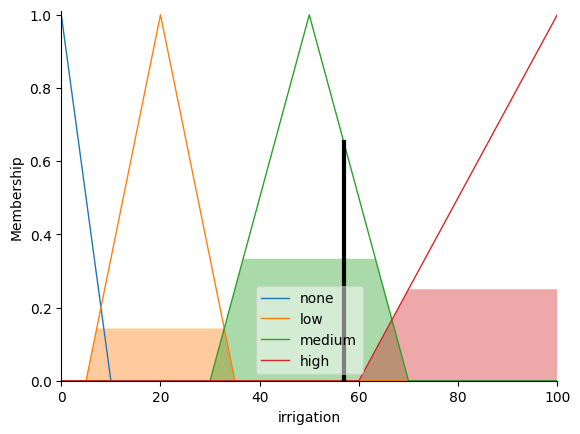

In [11]:
# Definition of inputs
irrigation_sim.input['soil'] = 30      # Soil moisture = 30
irrigation_sim.input['weather'] = 20   # Weather = 20 (sunny)

# Fuzzy system calculation
irrigation_sim.compute()

# Printing numeric output
print(f"Irrigation Output (Centroid): {irrigation_sim.output['irrigation']:.2f}")

# Display output membership graph along with output value
irrigation.view(sim=irrigation_sim)
plt.show()